In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,,
2007-10-05,32.926037,56.587513,61.593765,46.771885,50.512512,855215656
2007-10-08,31.240467,53.690639,58.500015,53.353138,58.500015,126671715
2007-10-09,33.367886,57.346889,57.853138,50.821888,53.718761,116725709
2007-10-10,33.678818,57.881264,59.062515,57.375015,58.837513,67931378
2007-10-11,37.442722,64.350014,67.500015,57.375015,67.500015,106320954


In [4]:
df.shape

(4208, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (Adj Close, POWERGRID.NS)  4208 non-null   float64
 1   (Close, POWERGRID.NS)      4208 non-null   float64
 2   (High, POWERGRID.NS)       4208 non-null   float64
 3   (Low, POWERGRID.NS)        4208 non-null   float64
 4   (Open, POWERGRID.NS)       4208 non-null   float64
 5   (Volume, POWERGRID.NS)     4208 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 230.1 KB


In [6]:
df.isnull().sum()

Price      Ticker      
Adj Close  POWERGRID.NS    0
Close      POWERGRID.NS    0
High       POWERGRID.NS    0
Low        POWERGRID.NS    0
Open       POWERGRID.NS    0
Volume     POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,80.413097,104.165058,105.540691,102.811225,104.222802,1.188963e+07
std,64.314025,60.546190,61.222254,59.830531,60.527683,2.061999e+07
min,19.223957,32.625008,34.875008,29.250008,34.706257,0.000000e+00
25%,36.956326,60.546108,61.284389,59.737514,60.609390,4.799653e+06
50%,56.154072,84.937523,86.779709,83.657833,85.289085,8.344398e+06
75%,84.084984,117.091434,118.307840,115.889091,117.112526,1.362032e+07
max,360.278564,365.450012,366.250000,357.200012,364.049988,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(     'Date',             ''),
            ('Adj Close', 'POWERGRID.NS'),
            (    'Close', 'POWERGRID.NS'),
            (     'High', 'POWERGRID.NS'),
            (      'Low', 'POWERGRID.NS'),
            (     'Open', 'POWERGRID.NS'),
            (   'Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.9260368347168,56.5875129699707,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08,31.240467071533203,53.69063949584961,58.50001525878906,53.3531379699707,58.50001525878906,126671715
3,2,2007-10-09,33.36788558959961,57.34688949584961,57.8531379699707,50.8218879699707,53.7187614440918,116725709
4,3,2007-10-10,33.67881774902344,57.881263732910156,59.06251525878906,57.37501525878906,58.8375129699707,67931378


In [13]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_18584\270396694.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,56.587513,61.593765,46.771885,50.512512,855215656
1,53.690639,58.500015,53.353138,58.500015,126671715
2,57.346889,57.853138,50.821888,53.718761,116725709
3,57.881264,59.062515,57.375015,58.837513,67931378
4,64.350014,67.500015,57.375015,67.500015,106320954


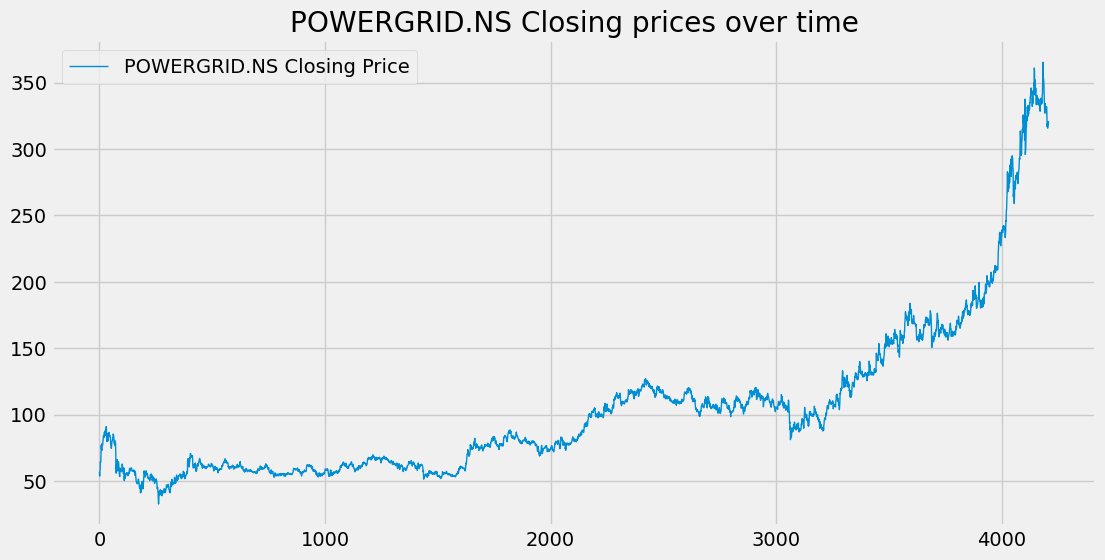

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

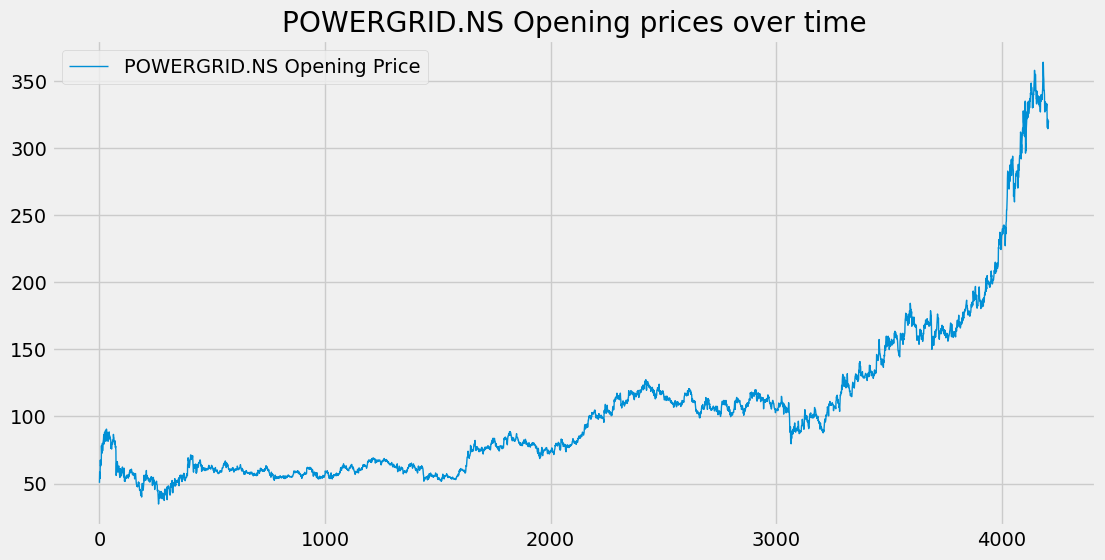

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

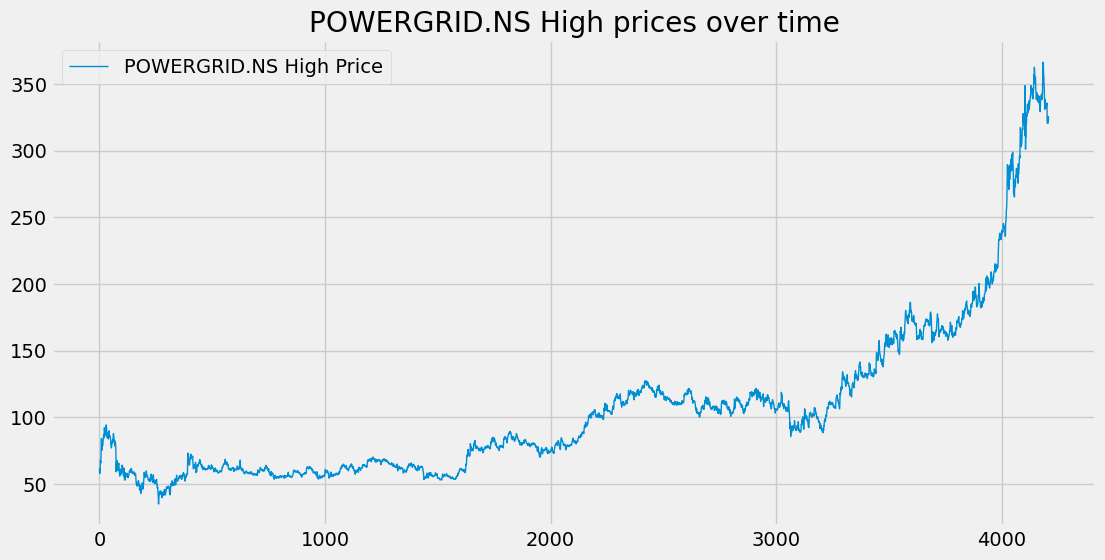

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

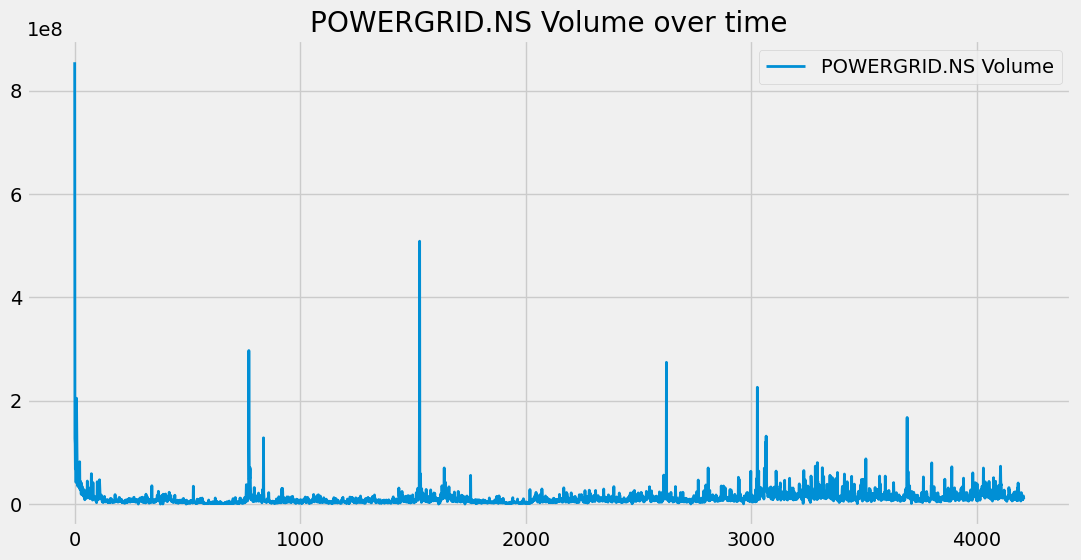

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [22]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [23]:
ma100 = df.Close.rolling(100).mean()

In [24]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,334.890499
4204,335.113999
4205,335.331499
4206,335.511499


In [25]:
ma200 = df.Close.rolling(200).mean()

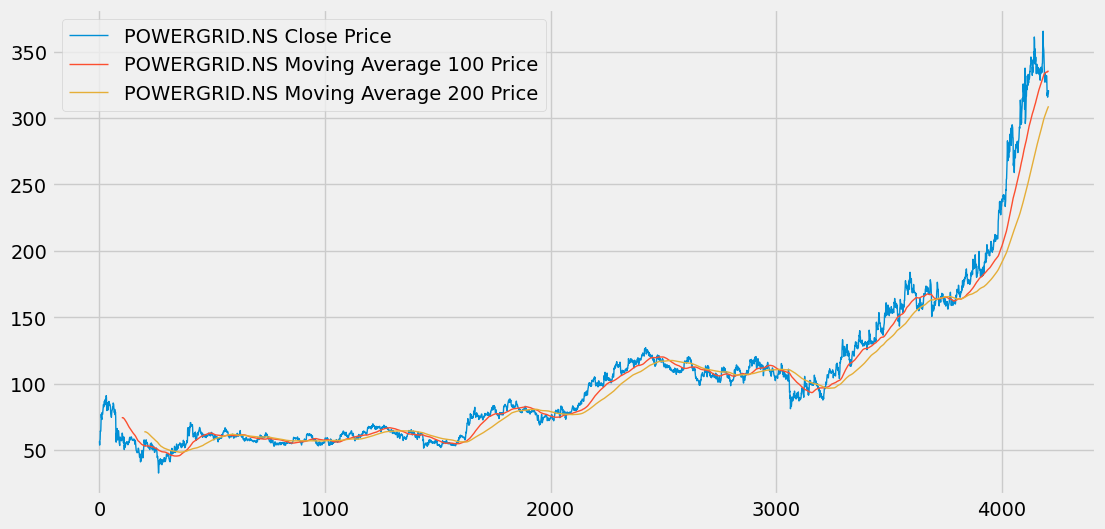

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

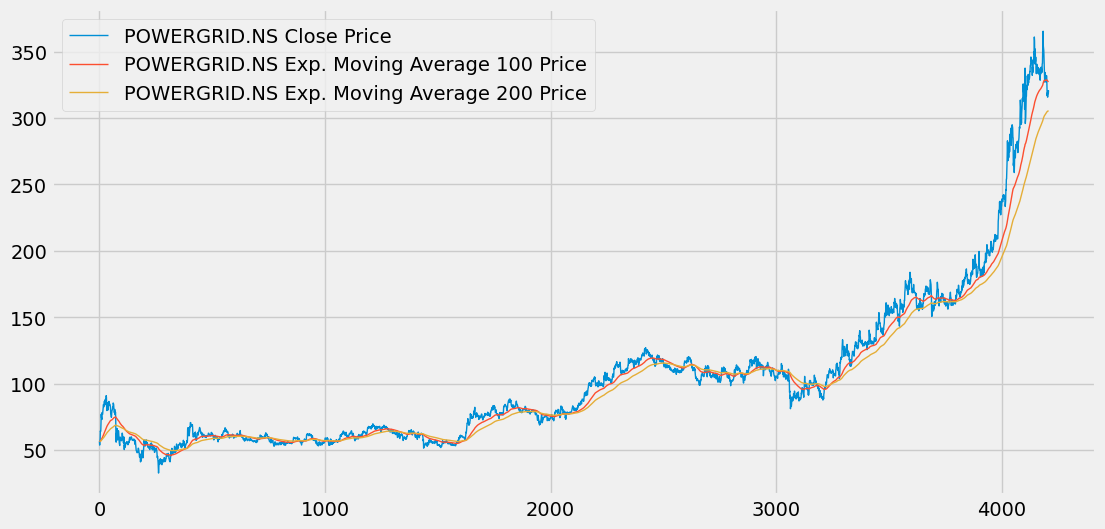

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [30]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [31]:
data_training.shape

(2945, 1)

In [32]:
data_testing.shape

(1263, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.25364691],
       [0.22298304],
       [0.26168503],
       ...,
       [0.82286392],
       [0.77582614],
       [0.78862755]])

In [36]:
data_training_array.shape[0]

2945

In [37]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [38]:
x_train.shape

(2845, 100, 1)

In [39]:
# Model Building
from tf_keras.layers import Dense, Dropout, LSTM
from tf_keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [40]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

89/89 [==============================] - 27s 211ms/step - loss: 0.0394
Epoch 2/50
89/89 [==============================] - 17s 194ms/step - loss: 0.0089
Epoch 3/50
89/89 [==============================] - 18s 205ms/step - loss: 0.0069
Epoch 4/50
89/89 [==============================] - 18s 197ms/step - loss: 0.0068
Epoch 5/50
89/89 [==============================] - 21s 239ms/step - loss: 0.0063
Epoch 6/50
89/89 [==============================] - 24s 264ms/step - loss: 0.0055
Epoch 7/50
89/89 [==============================] - 21s 233ms/step - loss: 0.0053
Epoch 8/50
89/89 [==============================] - 21s 234ms/step - loss: 0.0051
Epoch 9/50
89/89 [==============================] - 22s 247ms/step - loss: 0.0050
Epoch 10/50
89/89 [==============================] - 16s 177ms/step - loss: 0.0052
Epoch 11/50
89/89 [==============================] - 16s 181ms/step - loss: 0.0051
Epoch 12/50
89/89 [==============================] - 19s 216ms/step - loss: 0.0045
Epoch 13/50

In [43]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

Ticker,POWERGRID.NS
0,104.850029
1,106.987526
2,107.353149
3,107.128151
4,107.746902


In [47]:
input_data = scaler.fit_transform(final_df)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [49]:
x_test.shape

(1263, 100, 1)

In [50]:
y_predicted = model.predict(x_test)

40/40 [==============================] - 3s 59ms/step


In [51]:
y_predicted.shape

(1263, 1)

In [52]:
scaler.scale_

array([0.0035166])

In [53]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

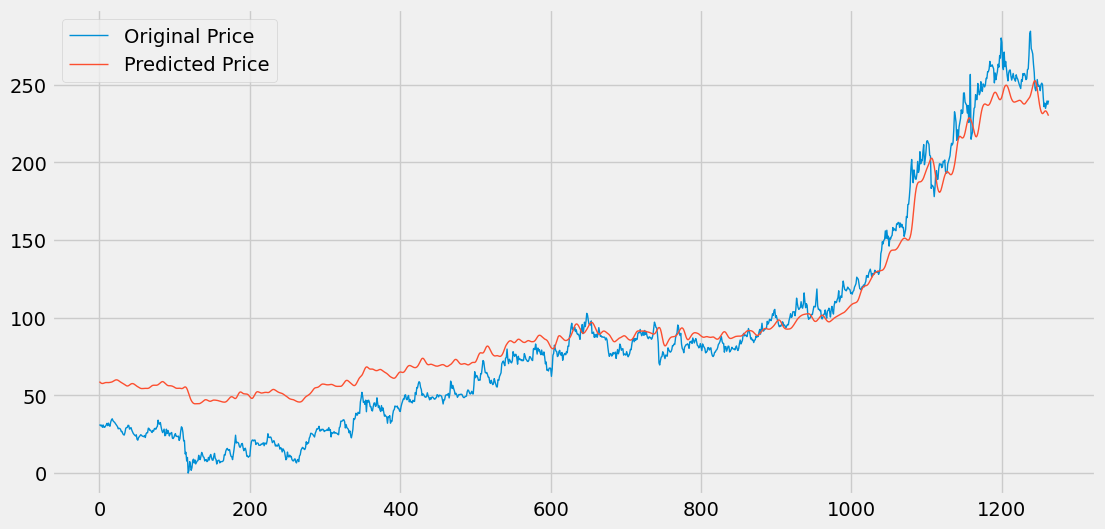

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [55]:
model.save('stock_dl_model.h5')

d:\Python Projects\Stock Price Prediction\.venv\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.

